In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.experiments_functions import get_img_info_simple
import utils.noise_generator as noise_gen
import utils.utils as utils_functions

## Plot "1 image from each class"

In [11]:
images_data = pd.read_csv(f"results/qualificacao_noises/sintorn_noises/sintorn_noises.csv")
images_data.head(10)

,Smoothness,Curve structure,Entropy,Complexity,image_name,noise_type,noise_param
0,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,original,0.00
1,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,salt_and_pepper,0.00
2,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,speckle,0.00
3,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,gaussian,0.00
4,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,poisson,0.00
5,0.043280,0.111536,0.981964,0.022873,canesugar01-r000-s001,salt_and_pepper,0.15
6,0.011998,0.053753,0.966185,0.043591,canesugar01-r000-s001,salt_and_pepper,0.25
7,0.063702,0.025135,0.877806,0.143809,canesugar01-r000-s001,salt_and_pepper,0.40
8,0.171072,0.004098,0.712642,0.287117,canesugar01-r000-s001,salt_and_pepper,0.50
9,0.047993,0.059695,0.997370,0.003471,canesugar01-r000-s001,gaussian,0.10


In [13]:
# Rename 'noise_param' column to 'param'
images_data = images_data.rename(columns={'noise_param': 'param'})

# Display the first few rows to confirm the change
images_data.head()

,Smoothness,Curve structure,Entropy,Complexity,image_name,noise_type,param
0,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,original,0.0
1,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,salt_and_pepper,0.0
2,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,speckle,0.0
3,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,gaussian,0.0
4,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,poisson,0.0


In [14]:
# For each noise type, print the unique parameter values
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

print("Parameter values by noise type:")
for noise_type in noise_types:
    # Extract data for this noise type
    noise_data = images_data[images_data['noise_type'] == noise_type]
    # Get unique parameter values, sorted
    unique_params = sorted(noise_data['param'].unique())
    
    print(f"\n{noise_type.replace('_', ' ').title()}:")
    print(unique_params)
    print(f"Number of unique values: {len(unique_params)}")
    
    # Additional statistics
    print(f"Min: {min(unique_params)}, Max: {max(unique_params)}")
    
    # For specific noise types, show parameter ranges that might be of interest
    if noise_type == 'gaussian' or noise_type == 'speckle':
        small_range = [p for p in unique_params if p <= 0.2]
        print(f"Values ≤ 0.2: {small_range}")
    elif noise_type == 'poisson':
        small_range = [p for p in unique_params if p <= 1.0]
        large_range = [p for p in unique_params if p >= 10.0]
        print(f"Values ≤ 1.0: {small_range}")
        print(f"Values ≥ 10.0: {large_range}")

Parameter values by noise type:

Salt And Pepper:
[0.0, 0.15, 0.25, 0.4, 0.5]
Number of unique values: 5
Min: 0.0, Max: 0.5

Speckle:
[0.0, 0.2, 0.6, 1.0, 1.5]
Number of unique values: 5
Min: 0.0, Max: 1.5
Values ≤ 0.2: [0.0, 0.2]

Gaussian:
[0.0, 0.1, 0.3, 0.8, 1.0]
Number of unique values: 5
Min: 0.0, Max: 1.0
Values ≤ 0.2: [0.0, 0.1]

Poisson:
[0.0, 0.5, 1.0, 6.0, 20.0]
Number of unique values: 5
Min: 0.0, Max: 20.0
Values ≤ 1.0: [0.0, 0.5, 1.0]
Values ≥ 10.0: [20.0]


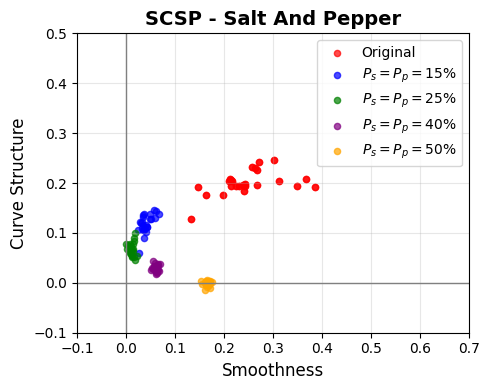

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


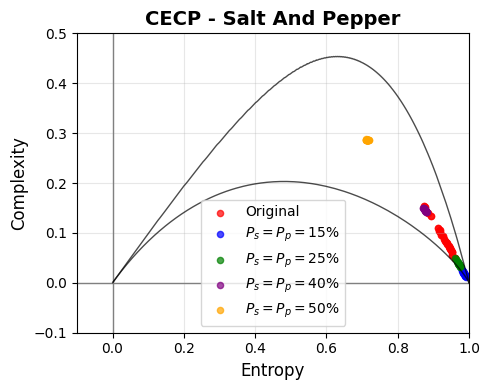

Plots created for salt_and_pepper


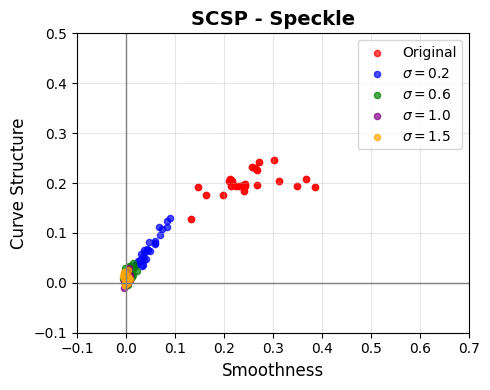

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


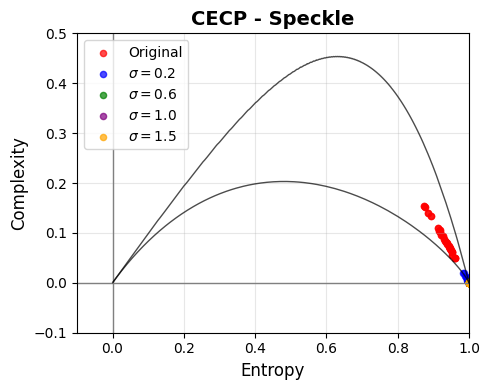

Plots created for speckle


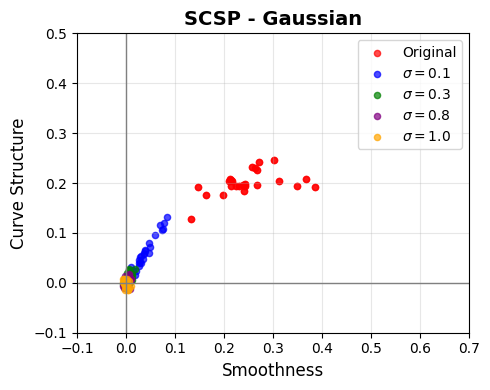

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


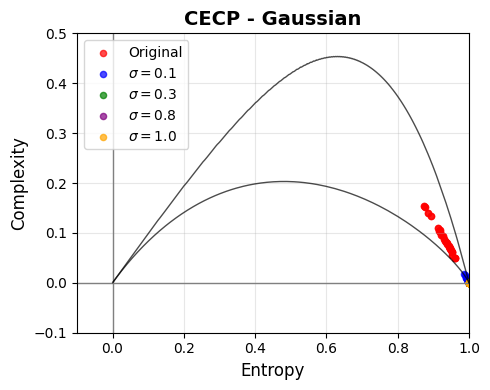

Plots created for gaussian


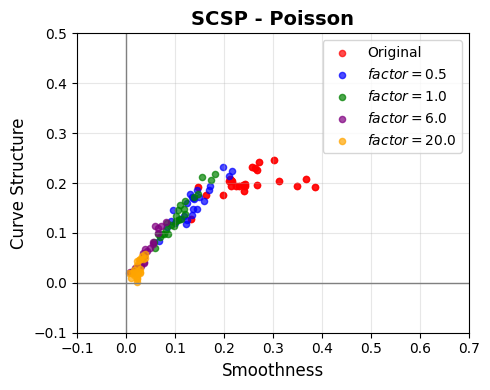

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


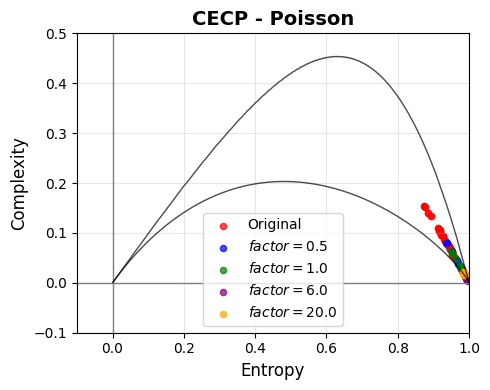

Plots created for poisson


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from utils.utils import read_entropy_complexity_limits

# Define color mapping for each noise parameter (original + 4 noise levels)
param_colors = {
    'original': 'red',
    'param1': 'blue',
    'param2': 'green',
    'param3': 'purple',
    'param4': 'orange'
}

# Define parameter labels for each noise type
param_labels = {
    'salt_and_pepper': {
        'original': 'Original',
        'param1': r'$P_s=P_p=15\%$',
        'param2': r'$P_s=P_p=25\%$',
        'param3': r'$P_s=P_p=40\%$',
        'param4': r'$P_s=P_p=50\%$'
    },
    'speckle': {
        'original': 'Original',
        'param1': r'$\sigma=0.2$',
        'param2': r'$\sigma=0.6$',
        'param3': r'$\sigma=1.0$',
        'param4': r'$\sigma=1.5$'
    },
    'gaussian': {
        'original': 'Original',
        'param1': r'$\sigma=0.1$',
        'param2': r'$\sigma=0.3$',
        'param3': r'$\sigma=0.8$',
        'param4': r'$\sigma=1.0$'
    },
    'poisson': {
        'original': 'Original',
        'param1': r'$factor=0.5$',
        'param2': r'$factor=1.0$',
        'param3': r'$factor=6.0$',
        'param4': r'$factor=20.0$'
    }
}


# Get parameter values for each noise type
noise_param_values = {
    'salt_and_pepper': [0.0, 0.15, 0.25, 0.4, 0.5],
    'speckle': [0.0, 0.2, 0.6, 1.0, 1.5],
    'gaussian': [0.0, 0.1, 0.3, 0.8, 1.0],
    'poisson': [0.0, 0.5, 1.0, 6.0, 20.0]
}

# Process each noise type
for noise_type in noise_types:
    # Filter data for this noise type
    noise_data = images_data[images_data['noise_type'].isin(['original', noise_type])]
    
    # ===== SCSP Plot (Smoothness vs Curve Structure) =====
    fig_scs, ax_scs = plt.subplots(figsize=(5, 4))
    ax_scs.set_title(f'SCSP - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    ax_scs.set_xlabel('Smoothness', fontsize=12)
    ax_scs.set_ylabel('Curve Structure', fontsize=12)
    ax_scs.grid(True, alpha=0.3)
    ax_scs.axhline(y=0, lw=1, color='gray')
    ax_scs.axvline(x=0, lw=1, color='gray')
    
    # Set fixed limits for consistent viewing
    ax_scs.set_xlim([-0.1, 0.7])
    ax_scs.set_ylim([-0.1, 0.5])
    
    # Create markers for each parameter level
    param_markers = {}
    unique_params = noise_param_values[noise_type]
    
    # Plot points for each image at each parameter level
    unique_images = images_data['image_name'].unique()
    
    for i, param_val in enumerate(unique_params):
        # Get color key
        color_key = 'original' if param_val == 0.0 else f'param{i}'
        color = param_colors[color_key]
        label = param_labels[noise_type][color_key]
        
        # Filter data for this parameter
        if param_val == 0.0:
            # For originals, use either original or noise_type with param=0
            param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                   ((noise_data['noise_type'] == noise_type) & 
                                    (noise_data['param'] == param_val))]
        else:
            param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                   (noise_data['param'] == param_val)]
        
        # Plot points
        scatter = ax_scs.scatter(param_data['Smoothness'], param_data['Curve structure'], 
                                color=color, label=label, alpha=0.7, s=20)
        param_markers[param_val] = scatter
    
    ax_scs.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'results/qualificacao_noises/sintorn_noises/sintorn_{noise_type}_scs_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig_scs)
    
    # ===== CECP Plot (Entropy vs Complexity) =====
    fig_cecp, ax_cecp = plt.subplots(figsize=(5, 4))
    ax_cecp.set_title(f'CECP - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    ax_cecp.set_xlabel('Entropy', fontsize=12)
    ax_cecp.set_ylabel('Complexity', fontsize=12)
    ax_cecp.grid(True, alpha=0.3)
    ax_cecp.axhline(y=0, lw=1, color='gray')
    ax_cecp.axvline(x=0, lw=1, color='gray')
    
    # Set fixed limits for CECP
    ax_cecp.set_xlim([-0.1, 1])
    ax_cecp.set_ylim([-0.1, 0.5])
    
    # Add CECP theoretical limits
    df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
    ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', lw=1, alpha=0.7)
    ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', lw=1, alpha=0.7)
    
    # Plot points for each image at each parameter level
    for i, param_val in enumerate(unique_params):
        # Get color key
        color_key = 'original' if param_val == 0.0 else f'param{i}'
        color = param_colors[color_key]
        label = param_labels[noise_type][color_key]
        
        # Filter data for this parameter
        if param_val == 0.0:
            # For originals, use either original or noise_type with param=0
            param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                   ((noise_data['noise_type'] == noise_type) & 
                                    (noise_data['param'] == param_val))]
        else:
            param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                   (noise_data['param'] == param_val)]
        
        # Plot points
        scatter = ax_cecp.scatter(param_data['Entropy'], param_data['Complexity'], 
                                 color=color, label=label, alpha=0.7, s=20)
    
    ax_cecp.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'results/qualificacao_noises/sintorn_noises/sintorn_{noise_type}_cecp_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig_cecp)
    
    print(f"Plots created for {noise_type}")


## Plot: "All images from the same class"

In [20]:
images_class = 'seeds02'
images_data = pd.read_csv(f"results/qualificacao_noises/sintorn_noises/class_analysis/class_analysis.csv")
images_data = images_data.rename(columns={'noise_param': 'param'})
images_data.head(5)

,Smoothness,Curve structure,Entropy,Complexity,image_name,image_class,noise_type,param
0,0.243813,0.197323,0.935753,0.081855,seeds02-r000-s001.png,seeds02,original,0.0
1,0.243813,0.197323,0.935753,0.081855,seeds02-r000-s001.png,seeds02,salt_and_pepper,0.0
2,0.243813,0.197323,0.935753,0.081855,seeds02-r000-s001.png,seeds02,speckle,0.0
3,0.243813,0.197323,0.935753,0.081855,seeds02-r000-s001.png,seeds02,gaussian,0.0
4,0.243813,0.197323,0.935753,0.081855,seeds02-r000-s001.png,seeds02,poisson,0.0


In [22]:
# For each noise type, print the unique parameter values
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

print("Parameter values by noise type:")
# Print unique image_class values
print(f"Image Classes: {images_data['image_class'].unique()}")
for noise_type in noise_types:
    # Extract data for this noise type
    noise_data = images_data[images_data['noise_type'] == noise_type]
    # Get unique parameter values, sorted
    unique_params = sorted(noise_data['param'].unique())
    
    print(f"\n{noise_type.replace('_', ' ').title()}:")
    print(unique_params)
    print(f"Number of unique values: {len(unique_params)}")
    
    # Additional statistics
    print(f"Min: {min(unique_params)}, Max: {max(unique_params)}")
    
    # For specific noise types, show parameter ranges that might be of interest
    if noise_type == 'gaussian' or noise_type == 'speckle':
        small_range = [p for p in unique_params if p <= 0.2]
        print(f"Values ≤ 0.2: {small_range}")
    elif noise_type == 'poisson':
        small_range = [p for p in unique_params if p <= 1.0]
        large_range = [p for p in unique_params if p >= 10.0]
        print(f"Values ≤ 1.0: {small_range}")
        print(f"Values ≥ 10.0: {large_range}")

Parameter values by noise type:
Image Classes: ['seeds02' 'fabric03' 'canesugar01' 'couscous01' 'fabric04']

Salt And Pepper:
[0.0, 0.15, 0.25, 0.4, 0.5]
Number of unique values: 5
Min: 0.0, Max: 0.5

Speckle:
[0.0, 0.2, 0.6, 1.0, 1.5]
Number of unique values: 5
Min: 0.0, Max: 1.5
Values ≤ 0.2: [0.0, 0.2]

Gaussian:
[0.0, 0.1, 0.3, 0.8, 1.0]
Number of unique values: 5
Min: 0.0, Max: 1.0
Values ≤ 0.2: [0.0, 0.1]

Poisson:
[0.0, 0.5, 1.0, 6.0, 20.0]
Number of unique values: 5
Min: 0.0, Max: 20.0
Values ≤ 1.0: [0.0, 0.5, 1.0]
Values ≥ 10.0: [20.0]


Processing 5 image classes: seeds02, fabric03, canesugar01, couscous01, fabric04


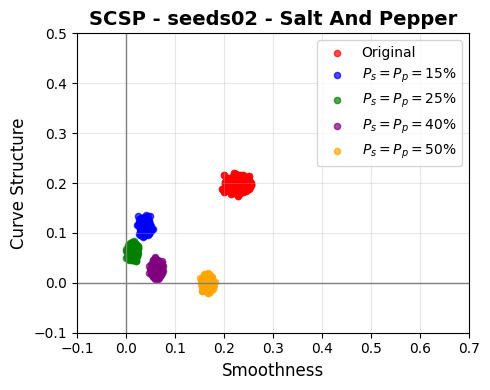

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


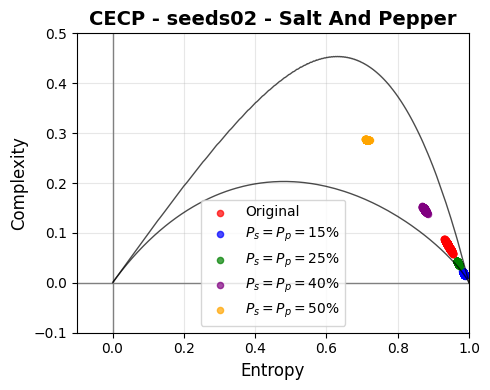

Plots created for seeds02 - salt_and_pepper


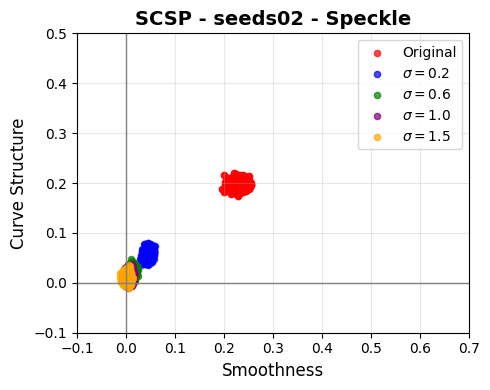

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


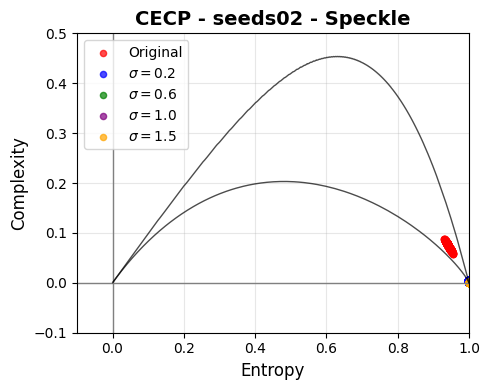

Plots created for seeds02 - speckle


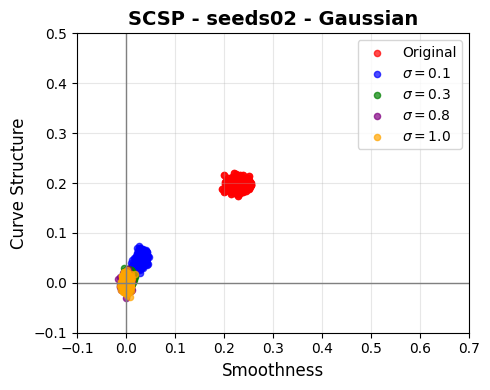

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


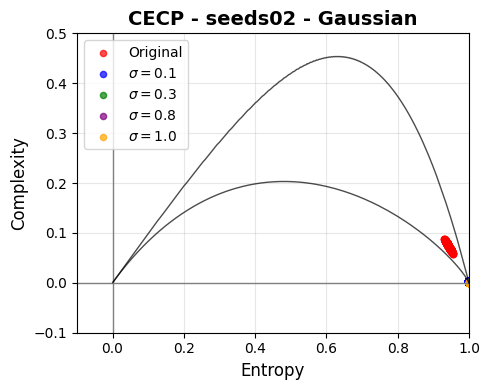

Plots created for seeds02 - gaussian


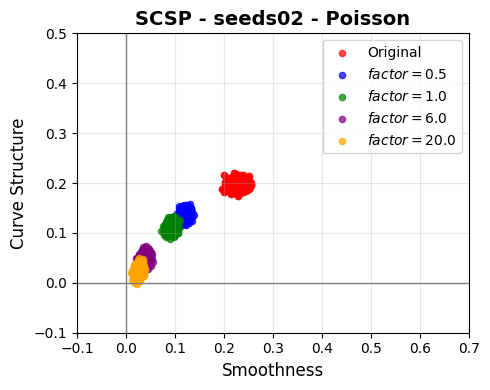

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


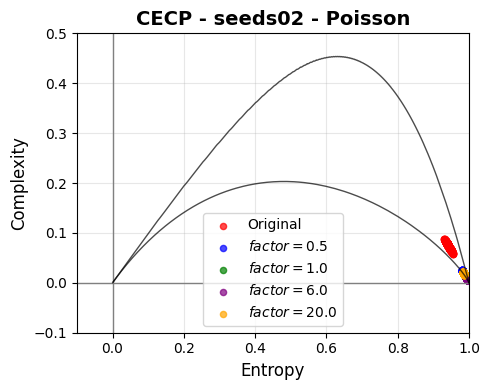

Plots created for seeds02 - poisson
Completed processing for seeds02


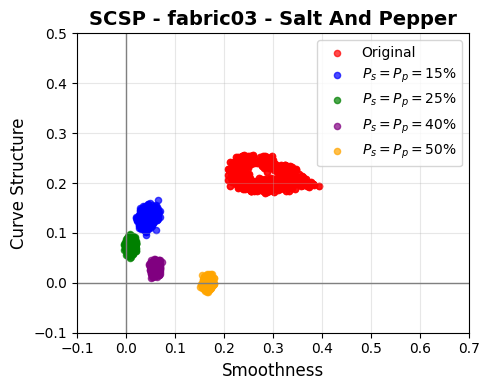

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


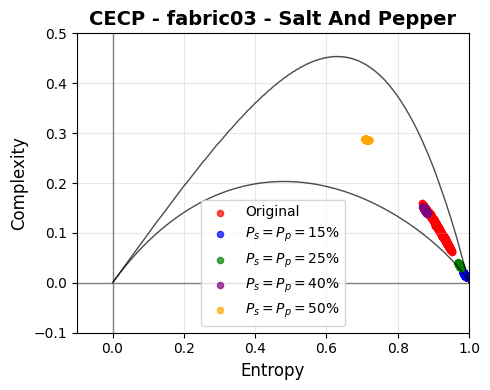

Plots created for fabric03 - salt_and_pepper


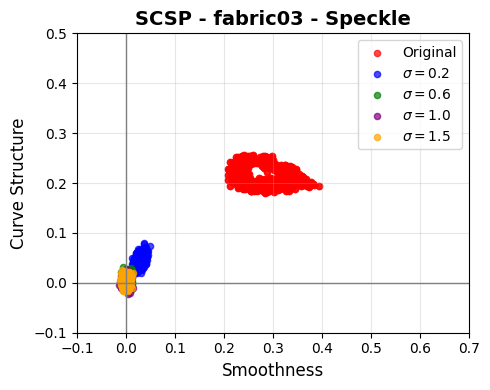

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


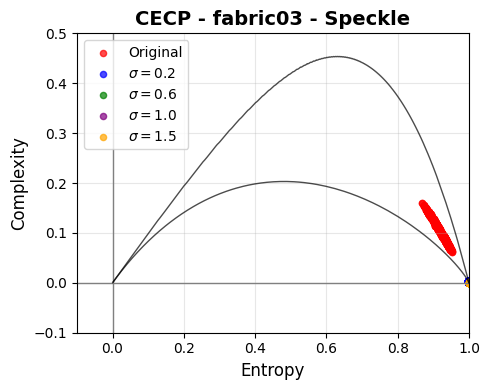

Plots created for fabric03 - speckle


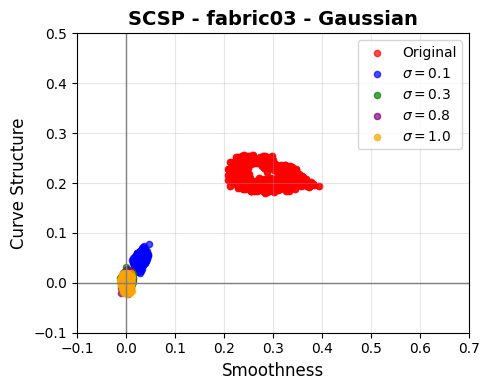

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


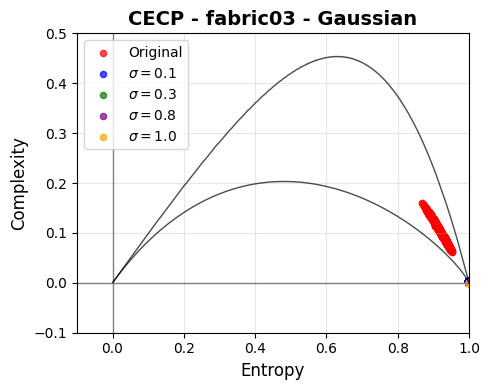

Plots created for fabric03 - gaussian


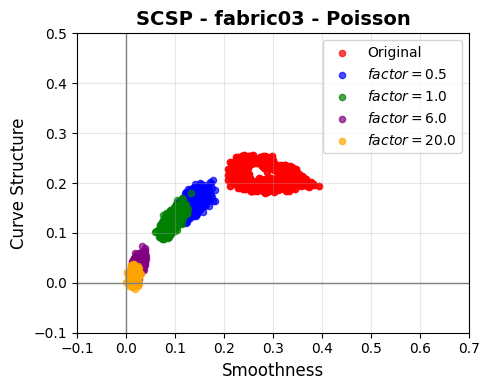

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


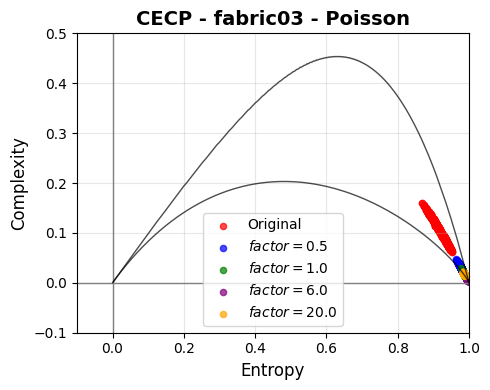

Plots created for fabric03 - poisson
Completed processing for fabric03


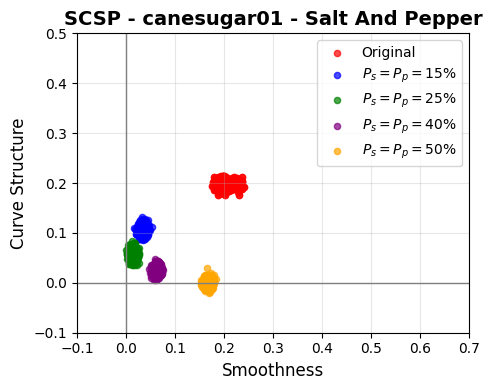

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


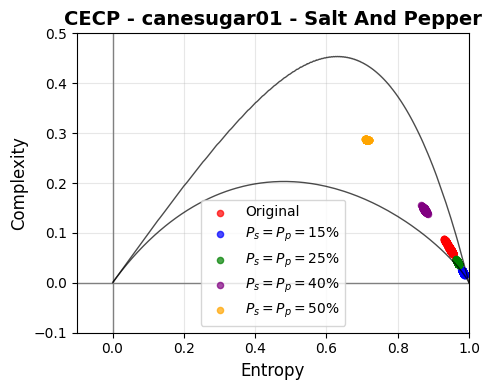

Plots created for canesugar01 - salt_and_pepper


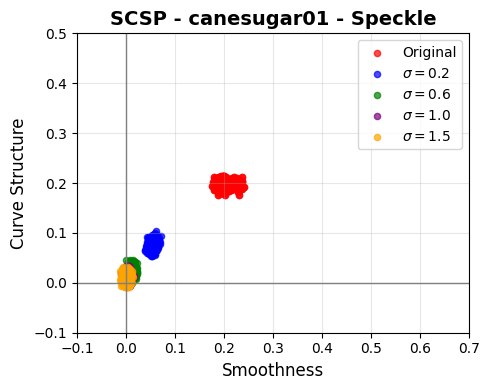

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


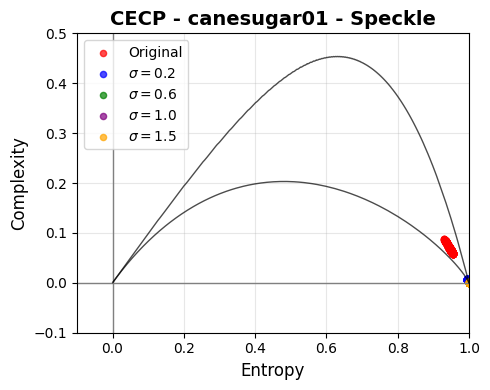

Plots created for canesugar01 - speckle


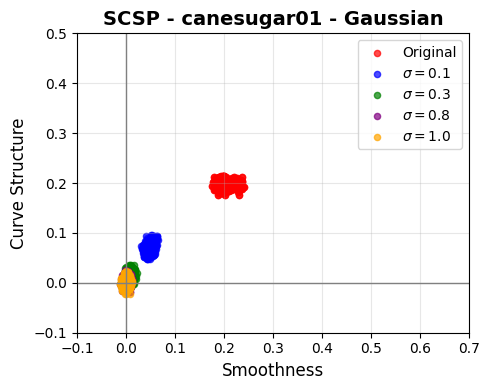

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


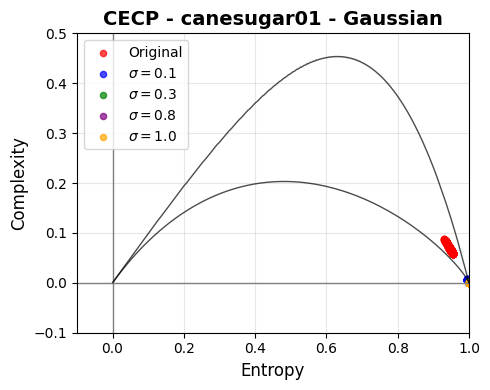

Plots created for canesugar01 - gaussian


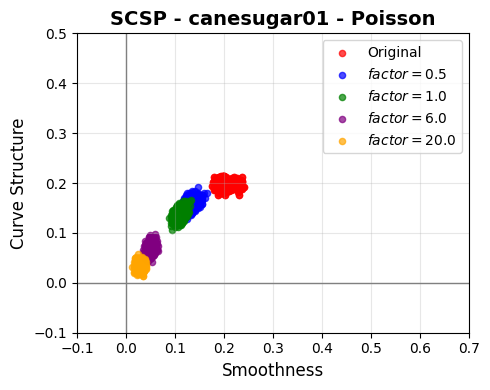

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


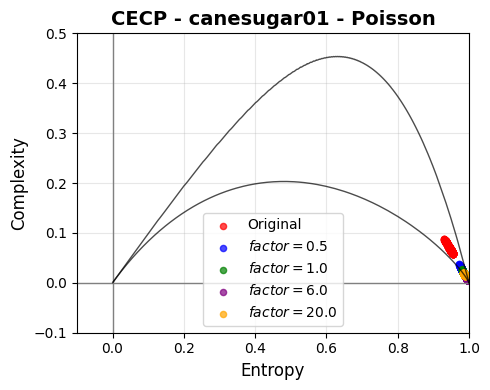

Plots created for canesugar01 - poisson
Completed processing for canesugar01


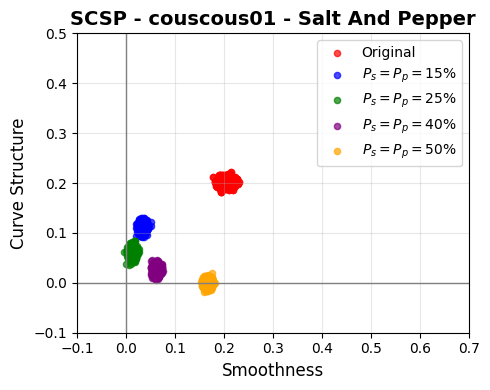

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


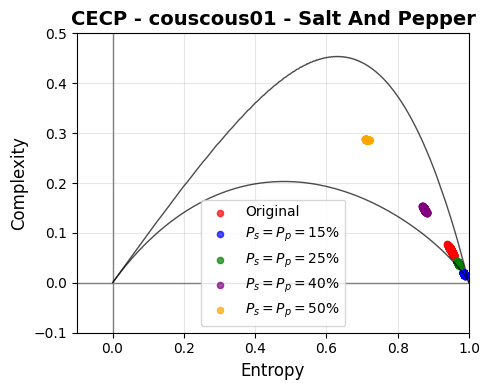

Plots created for couscous01 - salt_and_pepper


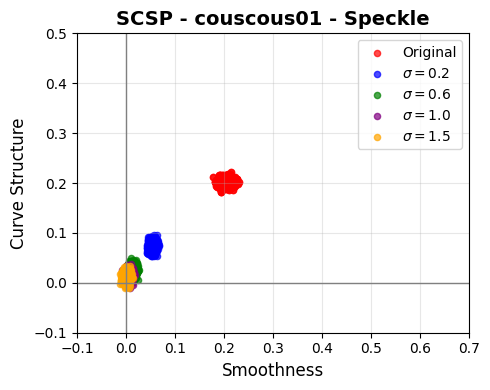

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


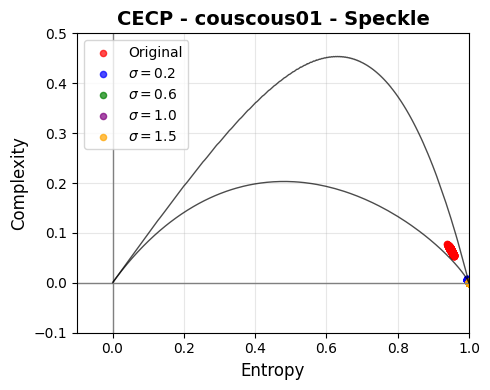

Plots created for couscous01 - speckle


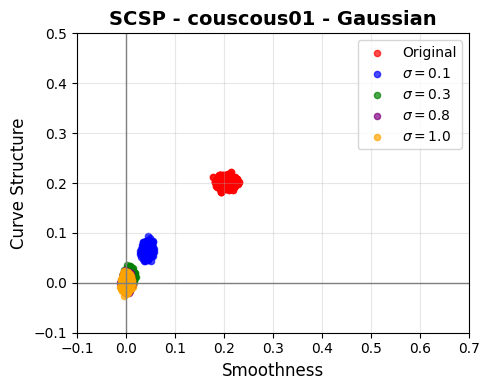

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


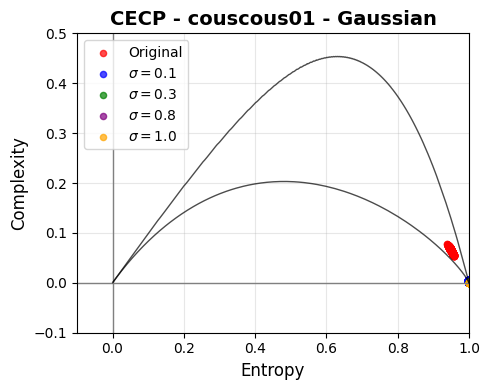

Plots created for couscous01 - gaussian


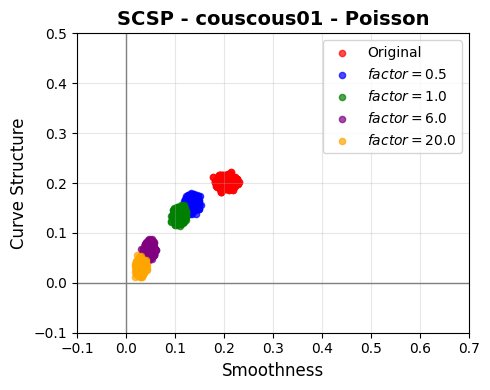

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


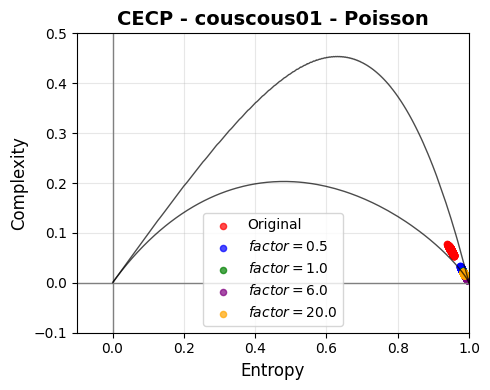

Plots created for couscous01 - poisson
Completed processing for couscous01


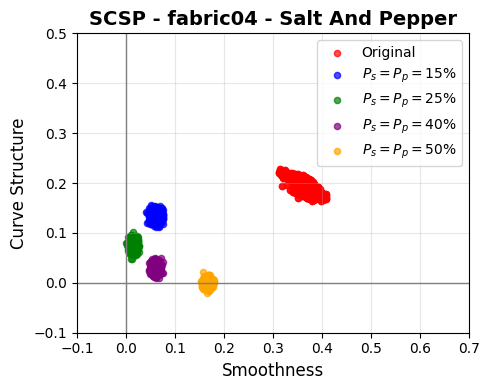

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


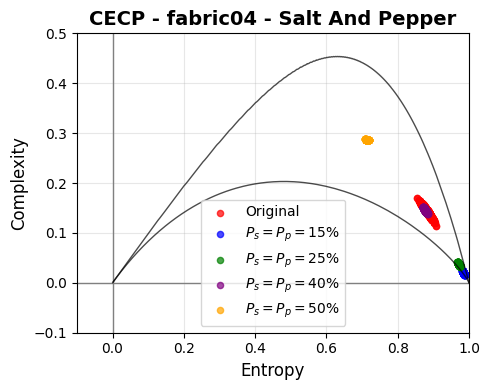

Plots created for fabric04 - salt_and_pepper


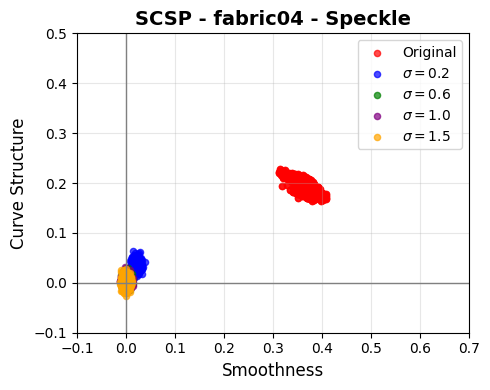

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


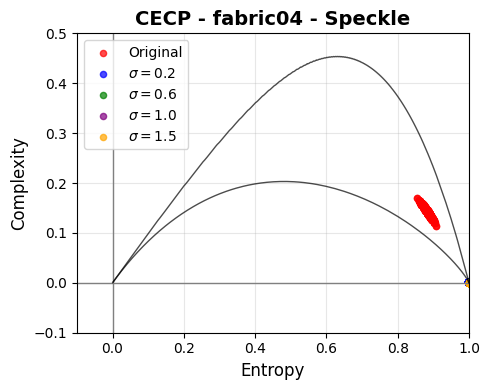

Plots created for fabric04 - speckle


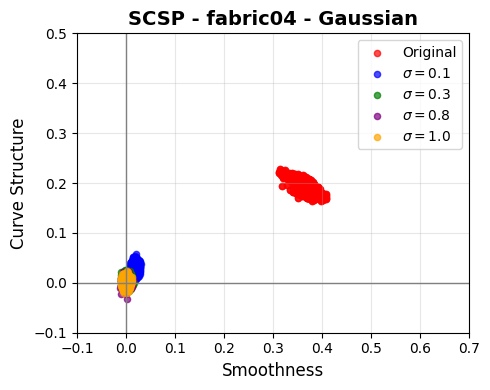

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


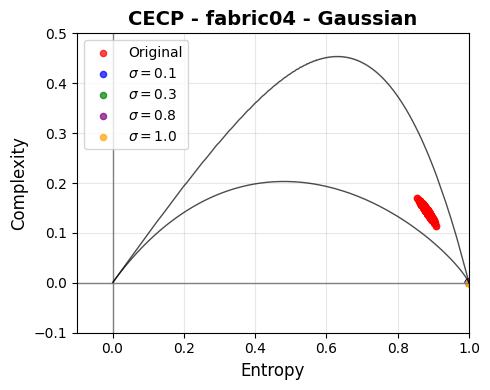

Plots created for fabric04 - gaussian


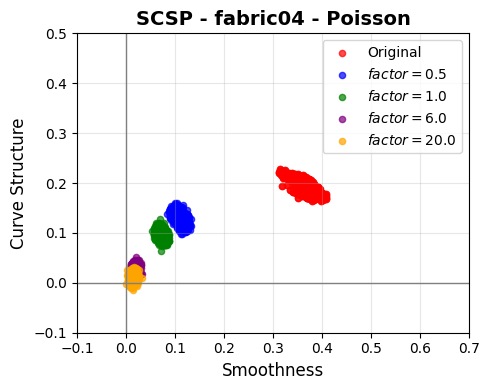

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


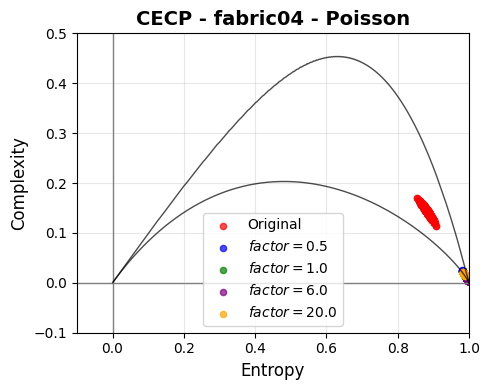

Plots created for fabric04 - poisson
Completed processing for fabric04


In [24]:
# Define color mapping for each noise parameter (original + 4 noise levels)
param_colors = {
    'original': 'red',
    'param1': 'blue',
    'param2': 'green',
    'param3': 'purple',
    'param4': 'orange'
}

# Define parameter labels for each noise type
param_labels = {
    'salt_and_pepper': {
        'original': 'Original',
        'param1': r'$P_s=P_p=15\%$',
        'param2': r'$P_s=P_p=25\%$',
        'param3': r'$P_s=P_p=40\%$',
        'param4': r'$P_s=P_p=50\%$'
    },
    'speckle': {
        'original': 'Original',
        'param1': r'$\sigma=0.2$',
        'param2': r'$\sigma=0.6$',
        'param3': r'$\sigma=1.0$',
        'param4': r'$\sigma=1.5$'
    },
    'gaussian': {
        'original': 'Original',
        'param1': r'$\sigma=0.1$',
        'param2': r'$\sigma=0.3$',
        'param3': r'$\sigma=0.8$',
        'param4': r'$\sigma=1.0$'
    },
    'poisson': {
        'original': 'Original',
        'param1': r'$factor=0.5$',
        'param2': r'$factor=1.0$',
        'param3': r'$factor=6.0$',
        'param4': r'$factor=20.0$'
    }
}

# Get parameter values for each noise type
noise_param_values = {
    'salt_and_pepper': [0.0, 0.15, 0.25, 0.4, 0.5],
    'speckle': [0.0, 0.2, 0.6, 1.0, 1.5],
    'gaussian': [0.0, 0.1, 0.3, 0.8, 1.0],
    'poisson': [0.0, 0.5, 1.0, 6.0, 20.0]
}

# Define noise types to process
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# Get all image classes from the data
image_classes = images_data['image_class'].unique()
print(f"Processing {len(image_classes)} image classes: {', '.join(image_classes)}")

# Process each image class
for img_class in image_classes:
    # Filter data for this image class
    class_data = images_data[images_data['image_class'] == img_class]
    
    # Process each noise type
    for noise_type in noise_types:
        # Filter data for this noise type and originals
        noise_data = class_data[class_data['noise_type'].isin(['original', noise_type])]
        
        if len(noise_data[noise_data['noise_type'] == noise_type]) == 0:
            print(f"No {noise_type} data for {img_class}, skipping...")
            continue
            
        # ===== SCSP Plot (Smoothness vs Curve Structure) =====
        fig_scs, ax_scs = plt.subplots(figsize=(5, 4))
        ax_scs.set_title(f'SCSP - {img_class} - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
        ax_scs.set_xlabel('Smoothness', fontsize=12)
        ax_scs.set_ylabel('Curve Structure', fontsize=12)
        ax_scs.grid(True, alpha=0.3)
        ax_scs.axhline(y=0, lw=1, color='gray')
        ax_scs.axvline(x=0, lw=1, color='gray')
        
        # Set fixed limits for consistent viewing
        ax_scs.set_xlim([-0.1, 0.7])
        ax_scs.set_ylim([-0.1, 0.5])
        
        # Get parameters for this noise type
        unique_params = noise_param_values[noise_type]
        
        # Plot points for each parameter level
        for i, param_val in enumerate(unique_params):
            # Get color key
            color_key = 'original' if param_val == 0.0 else f'param{i}'
            color = param_colors[color_key]
            label = param_labels[noise_type][color_key]
            
            # Filter data for this parameter
            if param_val == 0.0:
                # For originals, use either original or noise_type with param=0
                param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                      ((noise_data['noise_type'] == noise_type) & 
                                       (noise_data['param'] == param_val))]
            else:
                # Find closest parameter value in actual data
                actual_params = noise_data[noise_data['noise_type'] == noise_type]['param'].unique()
                if len(actual_params) > 0:
                    closest_param = min(actual_params, key=lambda x: abs(x - param_val))
                    param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                         (noise_data['param'] == closest_param)]
                else:
                    param_data = pd.DataFrame()  # Empty dataframe if no matches
            
            # Plot points if data exists
            if not param_data.empty:
                scatter = ax_scs.scatter(param_data['Smoothness'], param_data['Curve structure'], 
                                      color=color, label=label, alpha=0.7, s=20)
        
        ax_scs.legend(fontsize=10)
        plt.tight_layout()
        plt.savefig(f'results/qualificacao_noises/sintorn_noises/class_analysis/{img_class}_{noise_type}_scs_plot.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.close(fig_scs)
        
        # ===== CECP Plot (Entropy vs Complexity) =====
        fig_cecp, ax_cecp = plt.subplots(figsize=(5, 4))
        ax_cecp.set_title(f'CECP - {img_class} - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
        ax_cecp.set_xlabel('Entropy', fontsize=12)
        ax_cecp.set_ylabel('Complexity', fontsize=12)
        ax_cecp.grid(True, alpha=0.3)
        ax_cecp.axhline(y=0, lw=1, color='gray')
        ax_cecp.axvline(x=0, lw=1, color='gray')
        
        # Set fixed limits for CECP
        ax_cecp.set_xlim([-0.1, 1])
        ax_cecp.set_ylim([-0.1, 0.5])
        
        # Add CECP theoretical limits
        try:
            df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
            ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', lw=1, alpha=0.7)
            ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', lw=1, alpha=0.7)
        except Exception as e:
            print(f"Could not load complexity limits: {e}")
        
        # Plot points for each parameter level
        for i, param_val in enumerate(unique_params):
            # Get color key
            color_key = 'original' if param_val == 0.0 else f'param{i}'
            color = param_colors[color_key]
            label = param_labels[noise_type][color_key]
            
            # Filter data for this parameter
            if param_val == 0.0:
                # For originals, use either original or noise_type with param=0
                param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                      ((noise_data['noise_type'] == noise_type) & 
                                       (noise_data['param'] == param_val))]
            else:
                # Find closest parameter value in actual data
                actual_params = noise_data[noise_data['noise_type'] == noise_type]['param'].unique()
                if len(actual_params) > 0:
                    closest_param = min(actual_params, key=lambda x: abs(x - param_val))
                    param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                         (noise_data['param'] == closest_param)]
                else:
                    param_data = pd.DataFrame()  # Empty dataframe if no matches
            
            # Plot points if data exists
            if not param_data.empty:
                scatter = ax_cecp.scatter(param_data['Entropy'], param_data['Complexity'], 
                                       color=color, label=label, alpha=0.7, s=20)
        
        ax_cecp.legend(fontsize=10)
        plt.tight_layout()
        plt.savefig(f'results/qualificacao_noises/sintorn_noises/class_analysis/{img_class}_{noise_type}_cecp_plot.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.close(fig_cecp)
        
        print(f"Plots created for {img_class} - {noise_type}")
    
    print(f"Completed processing for {img_class}")

In [ ]:
# Define the image classes to compare
image_classes = ['seeds02', 'fabric03', 'canesugar01', 'couscous01', 'fabric04']

for img_class in image_classes:
    data_default = pd.read_csv(f"results/qualificacao_noises/sintorn_distribution/metrics_{img_class}.csv")
    
    # Create a new figure for the distribution plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f'Distribution of Metrics - {img_class}', fontsize=14, fontweight='bold')
    
    # Plot the distribution of each metric
    for metric in ['Entropy', 'Complexity', 'Smoothness', 'Curve structure']:
        ax.hist(data_default[metric], bins=30, alpha=0.5, label=metric)
    
    ax.set_xlabel('Metric Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'results/qualificacao_noises/sintorn_distribution/sintorn_{img_class}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()